In [1]:
import requests

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=AAPL&outputsize=full&apikey=LJHTRVJ6TEMRLDXI'
r = requests.get(url)
data = r.json()

print(data)

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'AAPL', '3. Last Refreshed': '2023-08-21', '4. Output Size': 'Full size', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2023-08-21': {'1. open': '175.0700', '2. high': '176.1300', '3. low': '173.7350', '4. close': '175.8400', '5. volume': '46311879'}, '2023-08-18': {'1. open': '172.3000', '2. high': '175.1000', '3. low': '171.9600', '4. close': '174.4900', '5. volume': '61172150'}, '2023-08-17': {'1. open': '177.1400', '2. high': '177.5054', '3. low': '173.4800', '4. close': '174.0000', '5. volume': '66062882'}, '2023-08-16': {'1. open': '177.1300', '2. high': '178.5400', '3. low': '176.5000', '4. close': '176.5700', '5. volume': '46964857'}, '2023-08-15': {'1. open': '178.8800', '2. high': '179.4800', '3. low': '177.0500', '4. close': '177.4500', '5. volume': '43622593'}, '2023-08-14': {'1. open': '177.9700', '2. high': '179.6900', '3. low': '177.3050', '4. close': '179.4600', 

In [2]:
import pandas as pd

# Extract Time Series data
time_series_data = data['Time Series (Daily)']

# Convert to DataFrame
APPL_stocks_df = pd.DataFrame.from_dict(time_series_data, orient='index')

# Rename columns for clarity
APPL_stocks_df.rename(columns={
    '1. open': 'Open',
    '2. high': 'High',
    '3. low': 'Low',
    '4. close': 'Close',
    '5. volume': 'Volume'
}, inplace=True)

# Convert columns to appropriate data types
APPL_stocks_df = APPL_stocks_df.astype({'Open': float, 'High': float, 'Low': float, 'Close': float, 'Volume': int})

# Convert index (date) to datetime
APPL_stocks_df.index = pd.to_datetime(APPL_stocks_df.index)

# Data Exploration:

In [3]:
APPL_stocks_df.tail()

,Open,High,Low,Close,Volume
1999-11-05,84.62,88.37,84.00,88.31,3721500
1999-11-04,82.06,85.37,80.62,83.62,3384700
1999-11-03,81.62,83.25,81.00,81.50,2932700
1999-11-02,78.00,81.69,77.31,80.25,3564600
1999-11-01,80.00,80.69,77.37,77.62,2487300


In [4]:
APPL_stocks_df.describe()

,Open,High,Low,Close,Volume
count,5989.000000,5989.000000,5989.000000,5989.000000,5.989000e+03
mean,173.242379,175.176945,171.199096,173.244778,3.187629e+07
std,150.553185,151.795688,149.106709,150.487313,3.012560e+07
min,12.990000,13.190000,12.720000,13.120000,7.025000e+05
25%,72.020000,72.790000,71.040000,71.847000,1.137250e+07
50%,132.380000,134.150000,130.330000,132.300000,2.333400e+07
75%,200.810000,202.810000,198.700000,200.656000,4.134234e+07
max,702.410000,705.070000,699.570000,702.100000,3.326072e+08


In [5]:
# Check for missing values in the DataFrame
missing_values = APPL_stocks_df.isna()
# Sum the missing values for each column
missing_sum = missing_values.sum()
missing_sum

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

# Data Cleaning:

# Data Visualization:

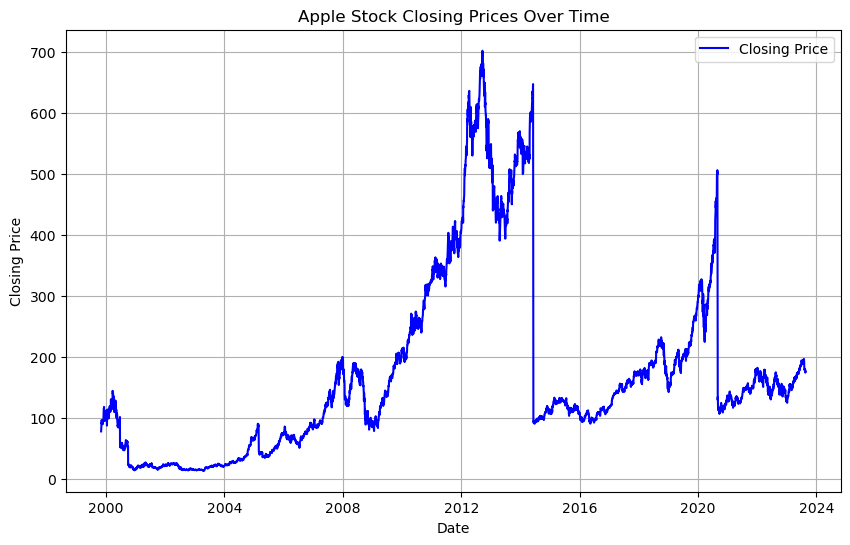

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(APPL_stocks_df.index, APPL_stocks_df['Close'], label='Closing Price', color='blue')
plt.title('Apple Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()


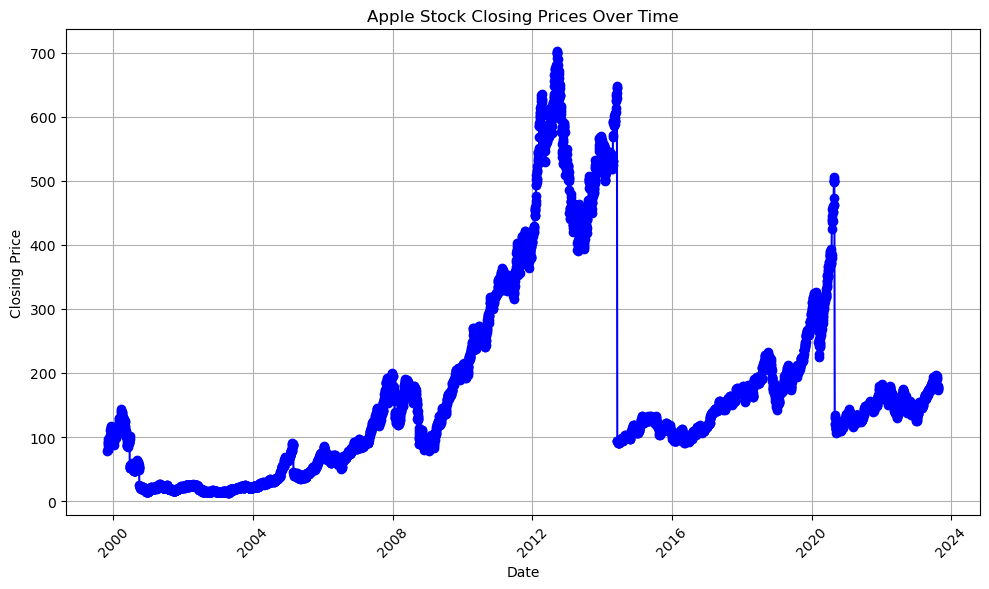

In [8]:
# Create the line chart

plt.figure(figsize=(10, 6))
plt.plot(APPL_stocks_df.index, APPL_stocks_df['Close'], marker='o', linestyle='-', color='blue')
plt.title('Apple Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [10]:
!pip install mplfinance

     ---------------------------------------- 0.0/75.0 kB ? eta -:--:--
     ---------------------------------------- 75.0/75.0 kB 4.0 MB/s eta 0:00:00


C:\Users\panka\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


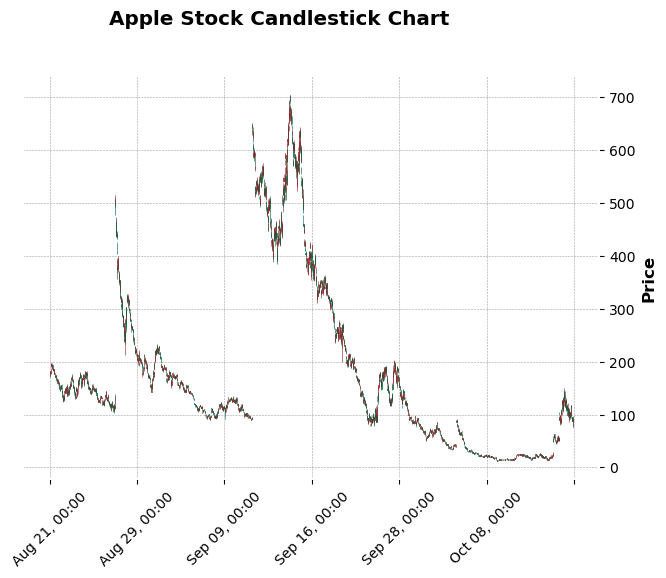

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

# Create the candlestick chart
mpf.plot(APPL_stocks_df, type='candle', style='charles', title='Apple Stock Candlestick Chart', ylabel='Price')

plt.show()


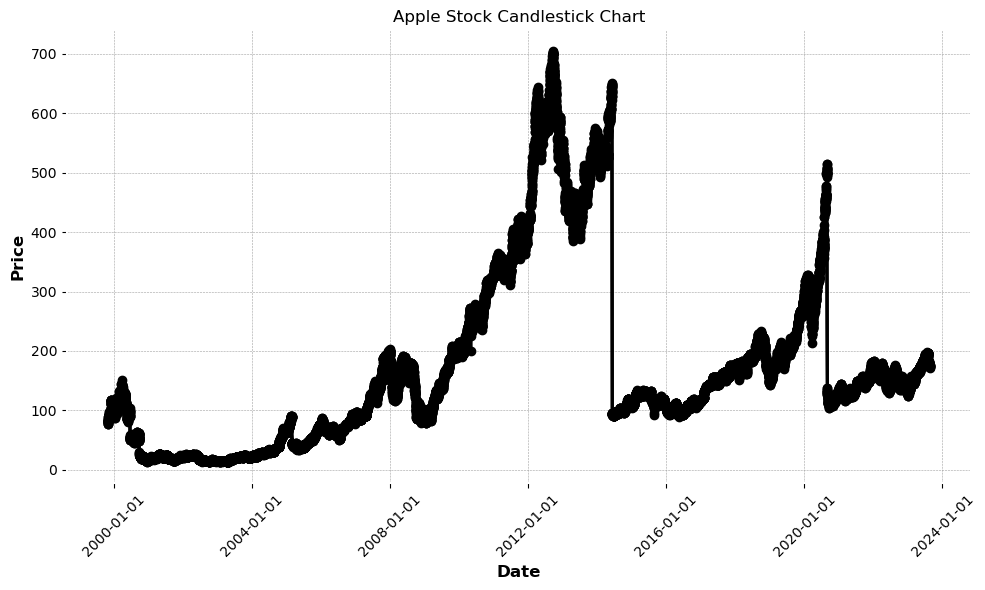

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import date2num

# Create the candlestick chart
fig, ax = plt.subplots(figsize=(10, 6))
candlestick = ax.plot(APPL_stocks_df.index, APPL_stocks_df[['Open', 'Close', 'High', 'Low']].values, marker='o', linestyle='-', color='black')

# Format x-axis as dates
ax.xaxis_date()
ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

ax.set_title('Apple Stock Candlestick Chart')
ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.tight_layout()
plt.show()


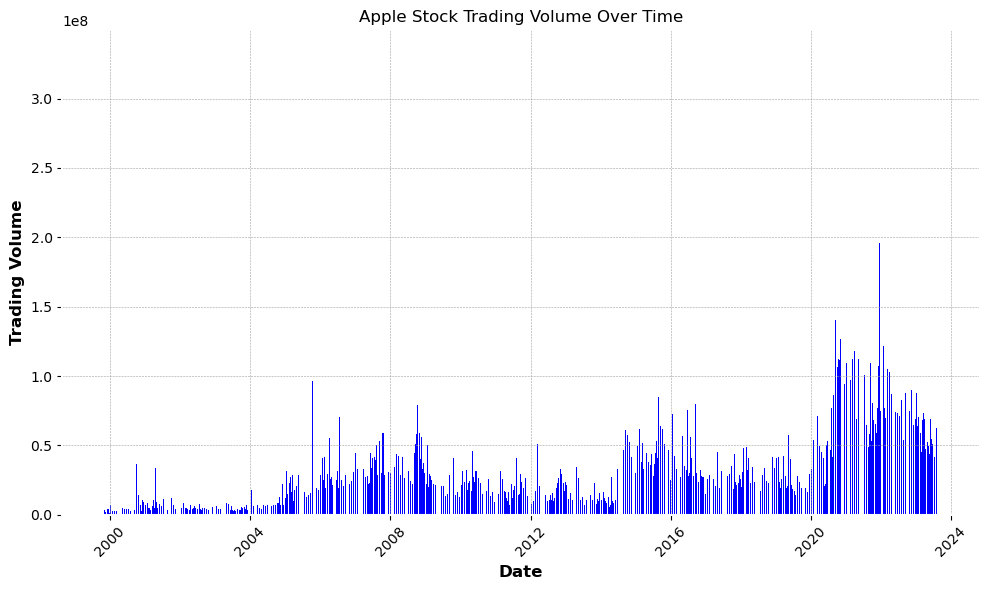

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the volume chart using a bar plot
plt.figure(figsize=(10, 6))
plt.bar(APPL_stocks_df.index, APPL_stocks_df['Volume'], color='blue')
plt.title('Apple Stock Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


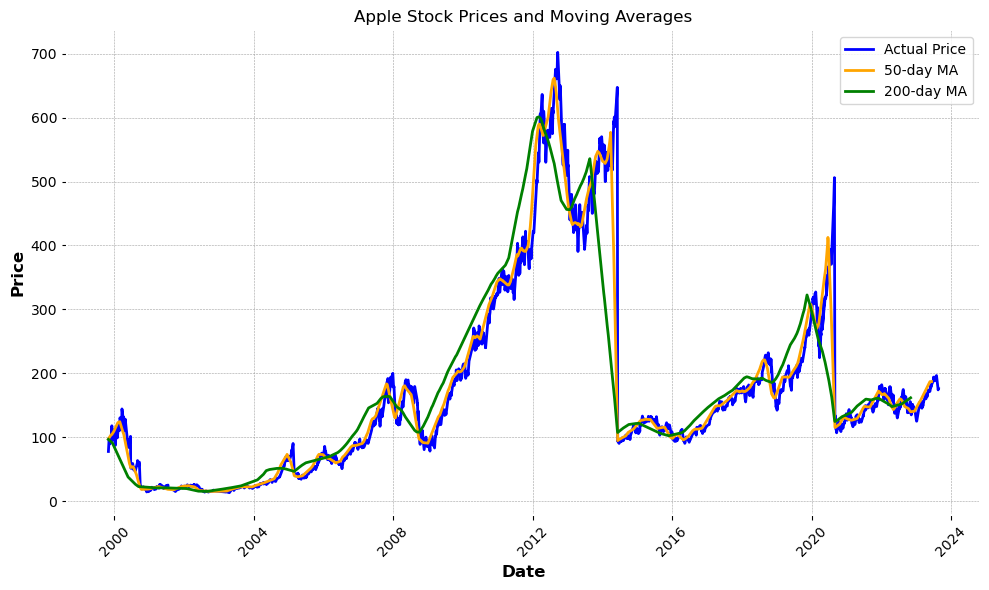

In [15]:
# Calculate moving averages
APPL_stocks_df['50-day MA'] = APPL_stocks_df['Close'].rolling(window=50).mean()
APPL_stocks_df['200-day MA'] = APPL_stocks_df['Close'].rolling(window=200).mean()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(APPL_stocks_df.index, APPL_stocks_df['Close'], label='Actual Price', color='blue')
plt.plot(APPL_stocks_df.index, APPL_stocks_df['50-day MA'], label='50-day MA', color='orange')
plt.plot(APPL_stocks_df.index, APPL_stocks_df['200-day MA'], label='200-day MA', color='green')
plt.title('Apple Stock Prices and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


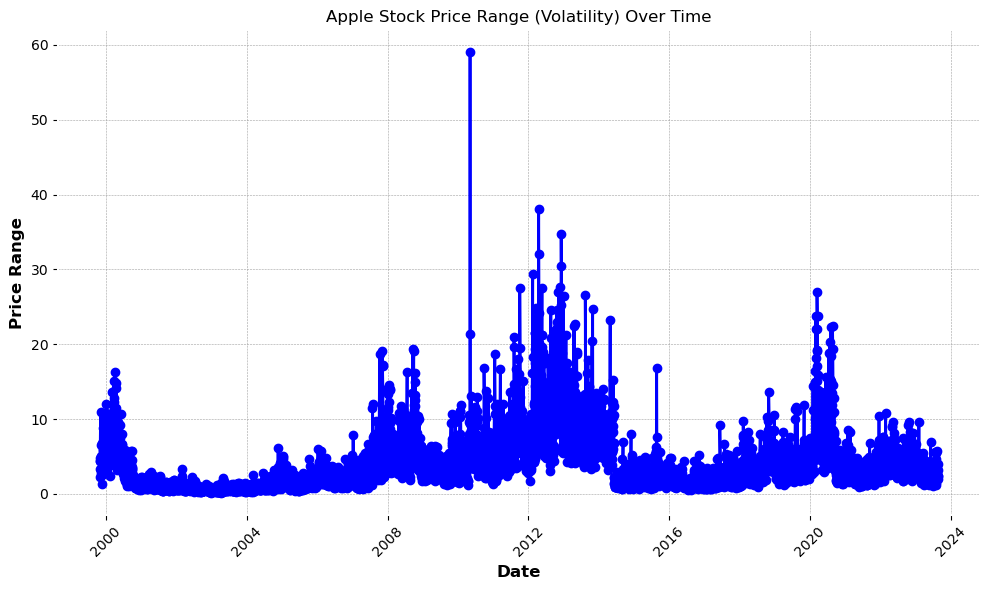

In [16]:
# Calculate the range (volatility) between high and low prices
APPL_stocks_df['Price Range'] = APPL_stocks_df['High'] - APPL_stocks_df['Low']

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(APPL_stocks_df.index, APPL_stocks_df['Price Range'], marker='o', linestyle='-', color='blue')
plt.title('Apple Stock Price Range (Volatility) Over Time')
plt.xlabel('Date')
plt.ylabel('Price Range')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


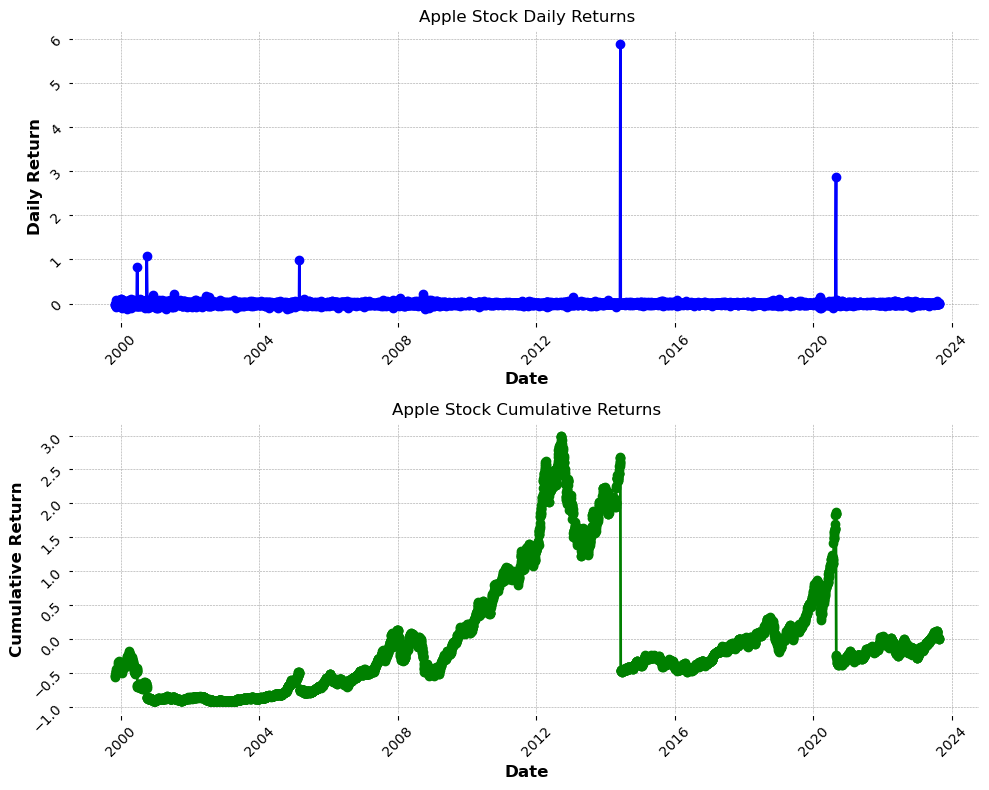

In [17]:
# Calculate daily returns
APPL_stocks_df['Daily Return'] = APPL_stocks_df['Close'].pct_change()

# Calculate cumulative returns
APPL_stocks_df['Cumulative Return'] = (1 + APPL_stocks_df['Daily Return']).cumprod() - 1

# Create the plots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Plot daily returns
axes[0].plot(APPL_stocks_df.index, APPL_stocks_df['Daily Return'], marker='o', linestyle='-', color='blue')
axes[0].set_title('Apple Stock Daily Returns')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Daily Return')
axes[0].grid(True)
axes[0].tick_params(rotation=45)

# Plot cumulative returns
axes[1].plot(APPL_stocks_df.index, APPL_stocks_df['Cumulative Return'], marker='o', linestyle='-', color='green')
axes[1].set_title('Apple Stock Cumulative Returns')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Cumulative Return')
axes[1].grid(True)
axes[1].tick_params(rotation=45)

plt.tight_layout()
plt.show()


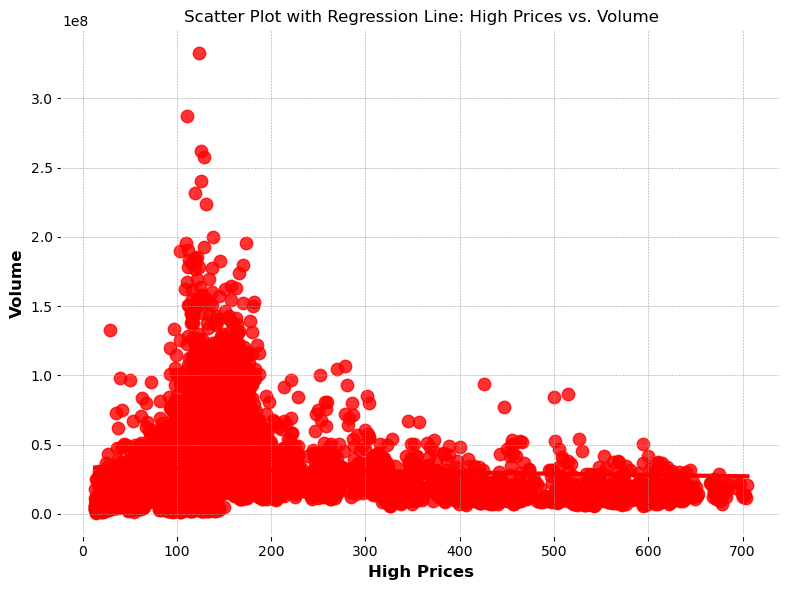

In [19]:
import seaborn as sns

# Create the scatter plot with regression line using Seaborn
plt.figure(figsize=(8, 6))
sns.regplot(x='High', y='Volume', data=APPL_stocks_df, scatter_kws={'s': 80}, color='red')
plt.title('Scatter Plot with Regression Line: High Prices vs. Volume')
plt.xlabel('High Prices')
plt.ylabel('Volume')
plt.tight_layout()

plt.show()


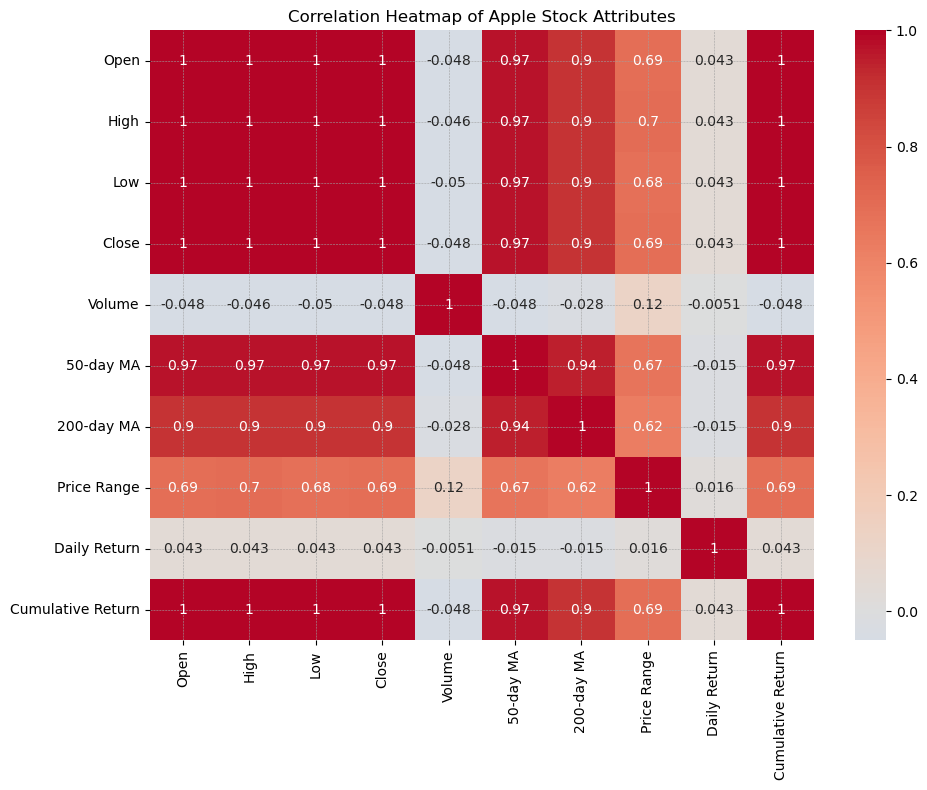

In [20]:
# Calculate the correlation matrix
correlation_matrix = APPL_stocks_df.corr()

# Create a correlation heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Apple Stock Attributes')
plt.tight_layout()

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf


# Calculate autocorrelation and plot ACF
plot_acf(df['Close'], lags=20)
plt.title('Autocorrelation of Apple Stock Closing Prices')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.tight_layout()

plt.show()
